In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
size = 100
path = "augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"

Displaying images from the 'MildDemented' category:


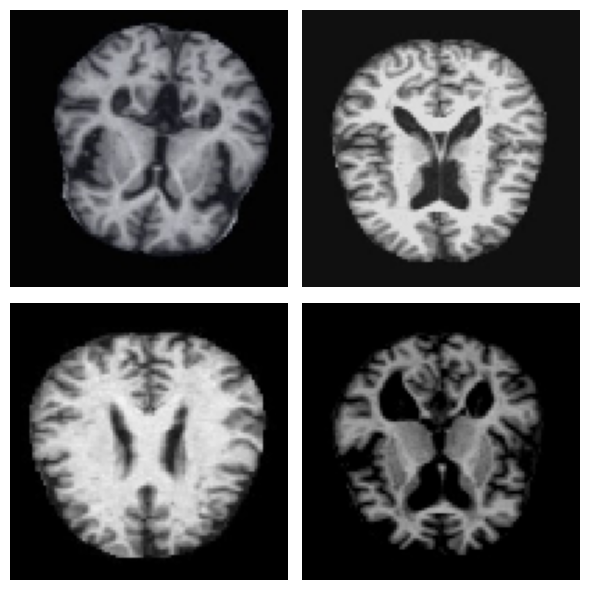

In [3]:
subclass = "MildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'ModerateDemented' category:


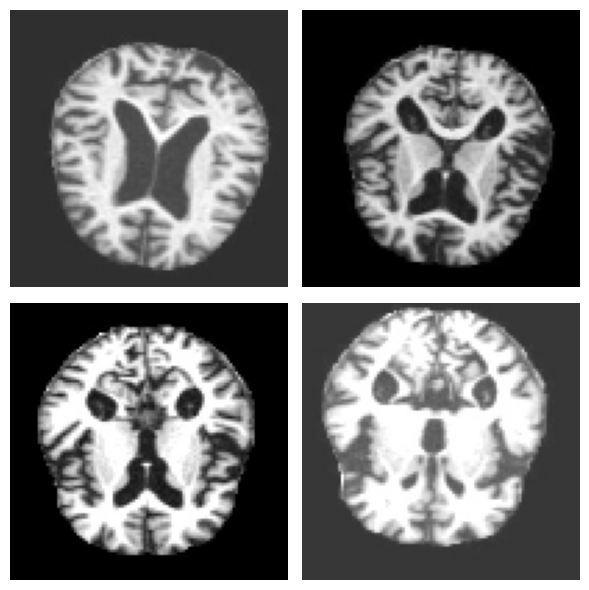

In [4]:
subclass = "ModerateDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'VeryMildDemented' category:


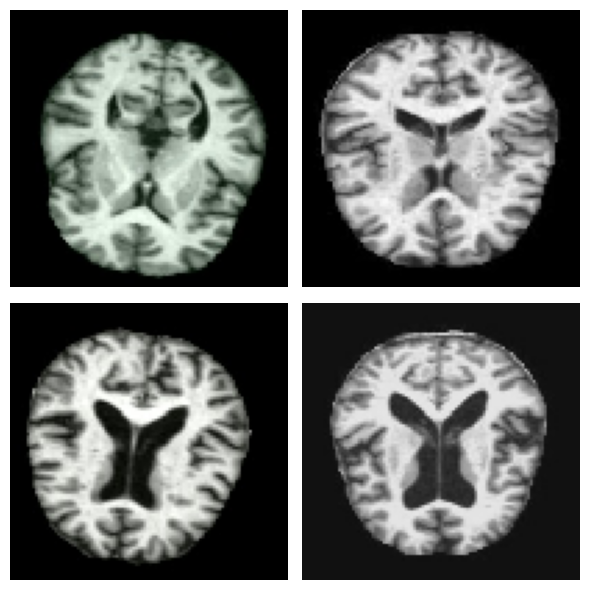

In [5]:
subclass = "VeryMildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'NonDemented' category:


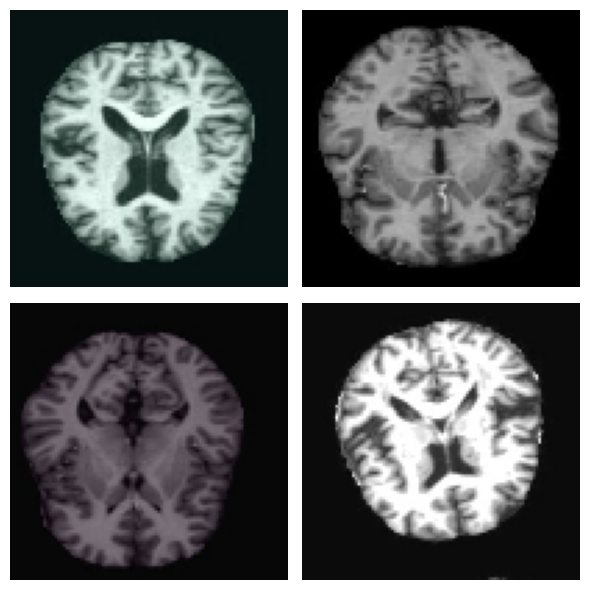

In [6]:
subclass = "NonDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [7]:
data_dir = pathlib.Path(path)

In [8]:
size_per_class = 3000

Mild_Demented = random.sample(list(data_dir.glob('MildDemented/*')), size_per_class)
Moderate_Demented = random.sample(list(data_dir.glob('ModerateDemented/*')), size_per_class)
Very_Mild_Demented = random.sample(list(data_dir.glob('VeryMildDemented/*')), size_per_class)
Non_Demented = random.sample(list(data_dir.glob('NonDemented/*')), size_per_class)

print(f"Selected {len(Mild_Demented)} images for Mild Demented class.")
print(f"Selected {len(Moderate_Demented)} images for Moderate Demented class.")
print(f"Selected {len(Very_Mild_Demented)} images for Very Mild Demented class.")
print(f"Selected {len(Non_Demented)} images for Non Demented class.")

Selected 3000 images for Mild Demented class.
Selected 3000 images for Moderate Demented class.
Selected 3000 images for Very Mild Demented class.
Selected 3000 images for Non Demented class.


In [9]:
df_images = {'Mild_Demented': Mild_Demented, 'Moderate_Demented': Moderate_Demented, 
             'Very_Mild_Demented': Very_Mild_Demented, 'Non_Demented': Non_Demented}

df_labels = {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Very_Mild_Demented': 2, 'Non_Demented': 3}

In [10]:
x, y = [], []
image_size = (75, 75)

for label, image_paths in df_images.items():
    for img_path in image_paths:
        try:
            img = imread(str(img_path))
            resized_img = resize(img, image_size, anti_aliasing=True)
            x.append(resized_img)
            y.append(df_labels[label])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

x = np.array(x)
y = np.array(y)

In [11]:
x = x/255.0

In [12]:
y = np.asarray(y).astype('float32').reshape((-1,1))
y = to_categorical(y, num_classes = 4)

In [13]:
from sklearn.model_selection import train_test_split
y = np.asarray(y).astype('float32')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
len(x_train)

9600

In [15]:
len(x_test)

2400

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [17]:
epochs = 20
input_shape = (75, 75, 3)